In [1]:
cd ..

/home/mars/src_aiai


In [2]:
import pickle
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from src.visualisation import compare, print_statistics, plot_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [5]:
data = "LLPS"
ISNR = 30

In [6]:
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
    ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

    ("U-net", "unet", "_sigmoid"),
    ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
    ("dU-net", "dunet", "_sigmoid"),
    ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
    ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
    ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
]


In [7]:
results = []
results += [(name, "Train", f"./data/processed/{data}/train_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [(name, "Test", f"./data/processed/{data}/test_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train", "Test"]]
# results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train"]]


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]

In [8]:
statistics = pd.read_csv(f"./results/{data}/statistics.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics.dropna(inplace=True)

In [9]:
# statistics = statistics[statistics.Set == "Train"]

|Name                                    |PSNR                |SSIM                |MSE                 |
|Adjoint_Test                            |  12.313 \pm   1.215|   0.077 \pm   0.050|   0.061 \pm   0.017|
|Adjoint_Train                           |  12.300 \pm   1.188|   0.078 \pm   0.049|   0.061 \pm   0.017|
|U-net_Test                              |  26.772 \pm   1.800|   0.857 \pm   0.017|   0.002 \pm   0.001|
|U-net_Train                             |  26.704 \pm   1.853|   0.856 \pm   0.018|   0.002 \pm   0.001|
|dU-net learned grad_Test                |  24.136 \pm   1.929|   0.836 \pm   0.023|   0.004 \pm   0.002|
|dU-net learned grad_Train               |  24.122 \pm   1.883|   0.835 \pm   0.025|   0.004 \pm   0.002|


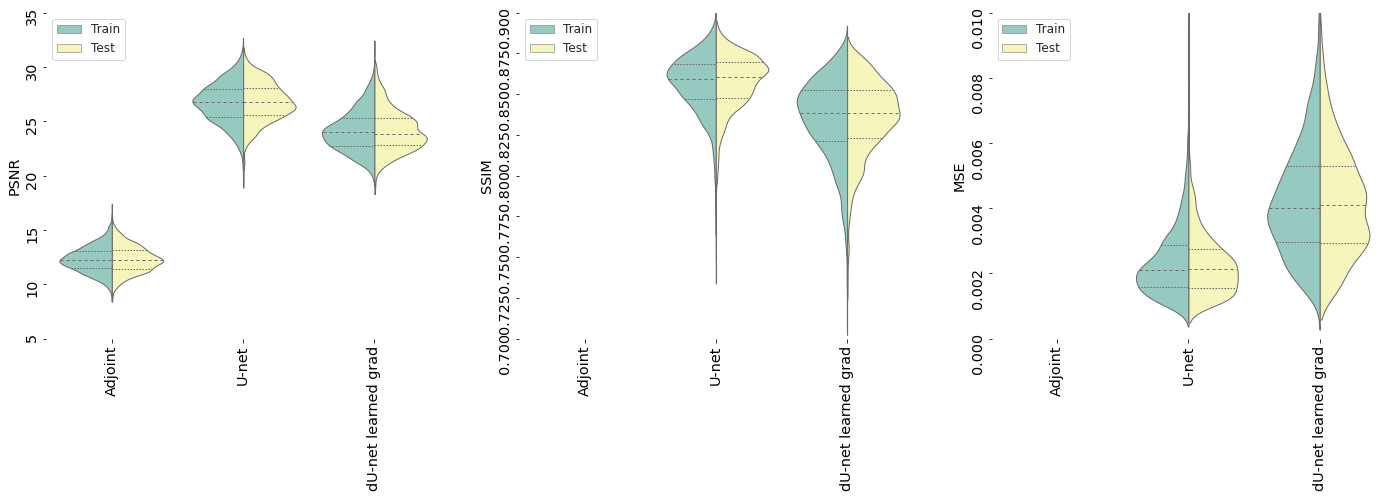

In [10]:
print_statistics(statistics, results, metrics)
plot_statistics(statistics, metrics, ylims=[[5,35], [0.7,0.9], [0,0.01]])

In [11]:
examples = pickle.load(open(f"./results/{data}/examples.pkl", "rb"))

In [12]:
train_ims = []
test_ims = []
train_titles = []
test_titles = []

for name, mode, im in examples:
    if mode == "Train":
        train_ims.append(im)
        train_titles.append(name)
    else:
        test_ims.append(im)
        test_titles.append(name)

In [13]:
train_ims[0].shape

(5, 256, 256)

In [14]:
len(train_ims)

4

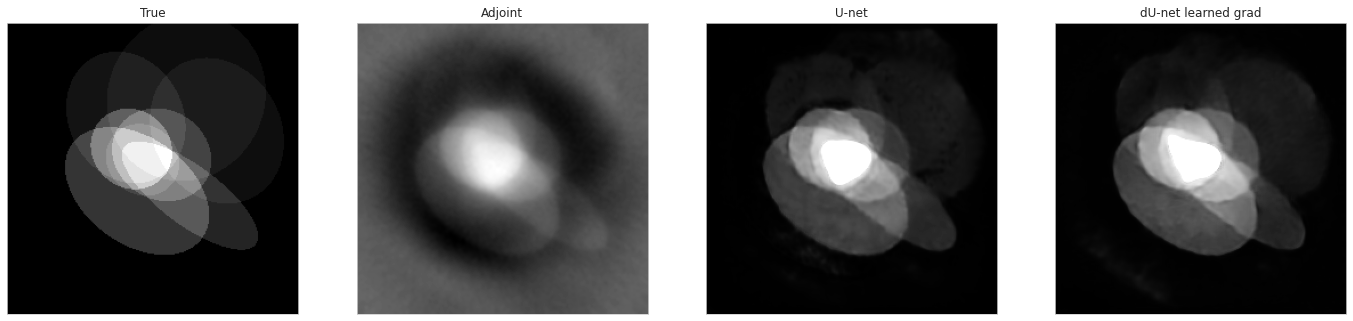

In [15]:
i=0
compare([ims[i] for ims in train_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)

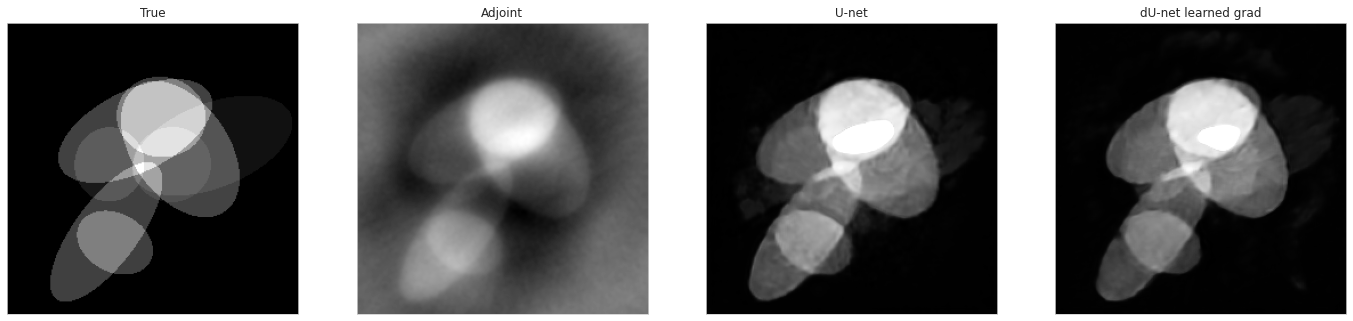

1


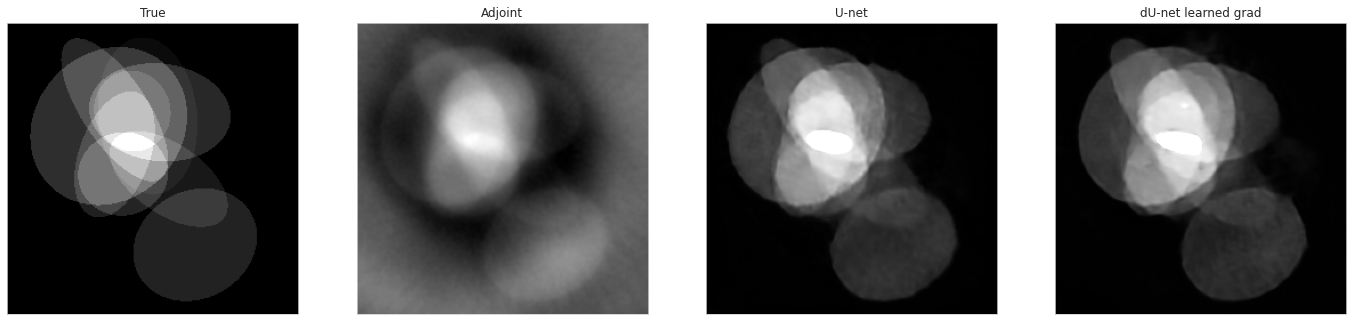

2


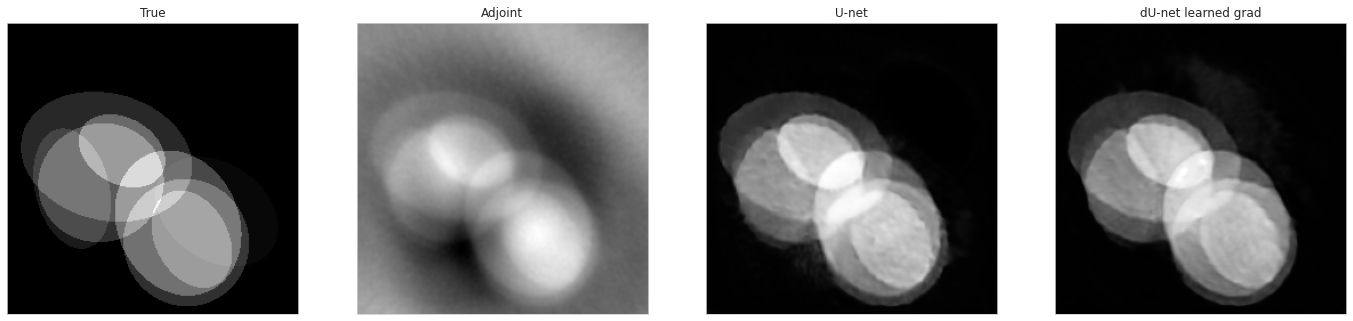

3


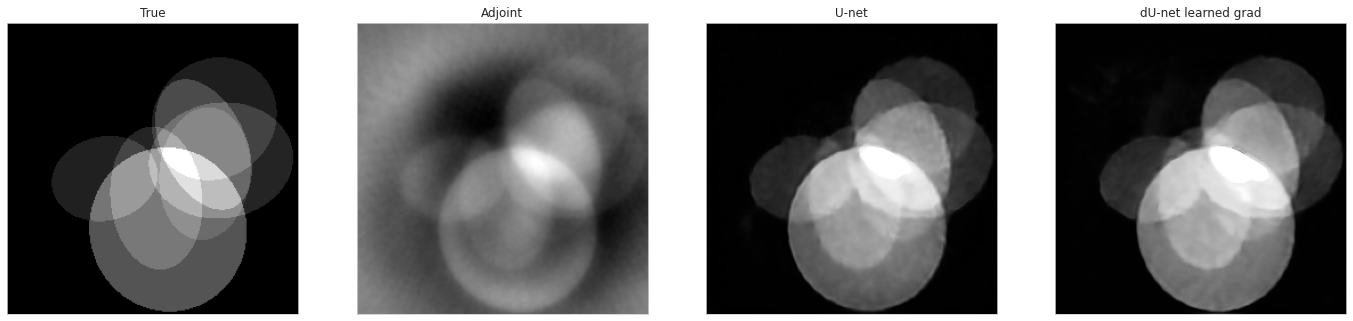

4


In [16]:
for i in range(1,5):
    compare([ims[i] for ims in train_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)
    print(i)

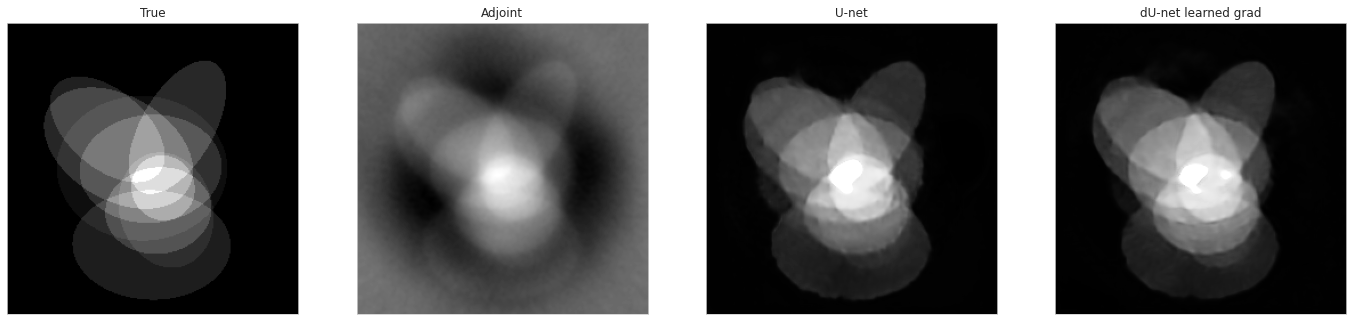

In [17]:
i=0
compare([ims[i] for ims in test_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)

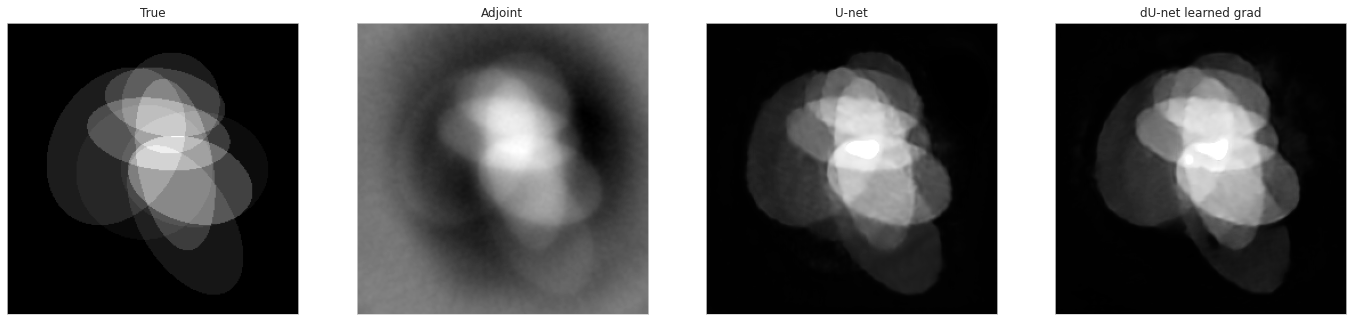

1


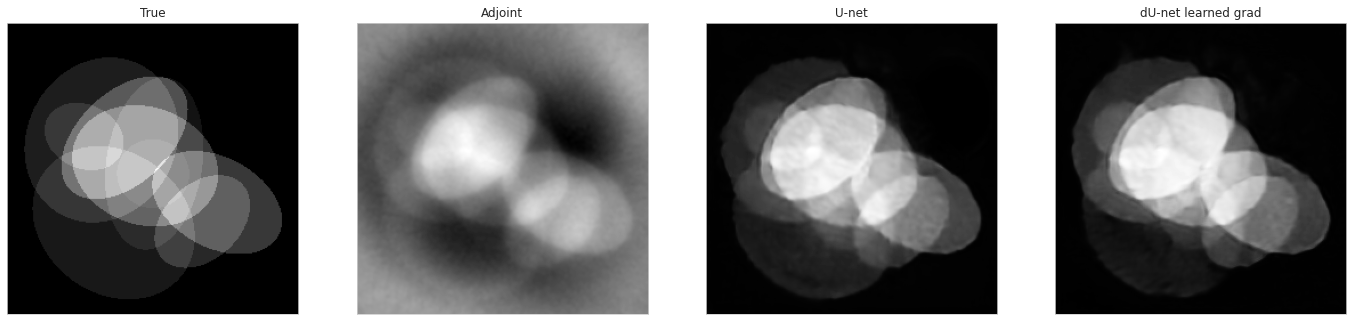

2


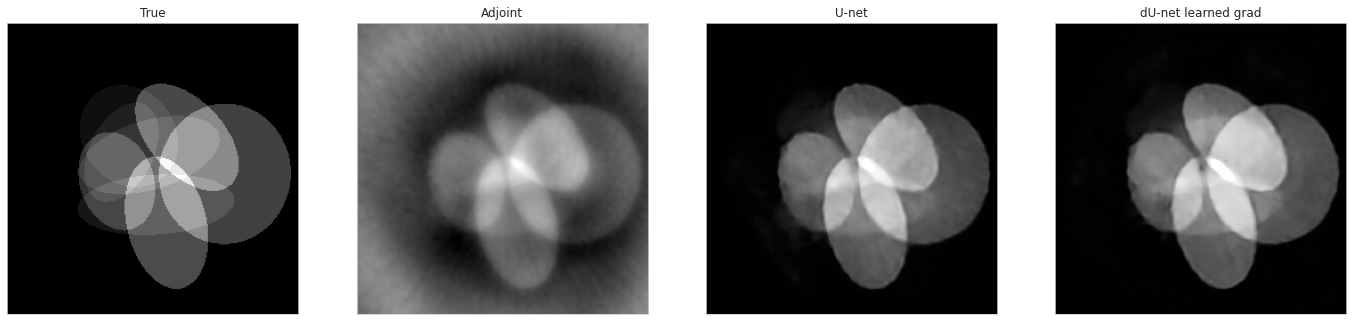

3


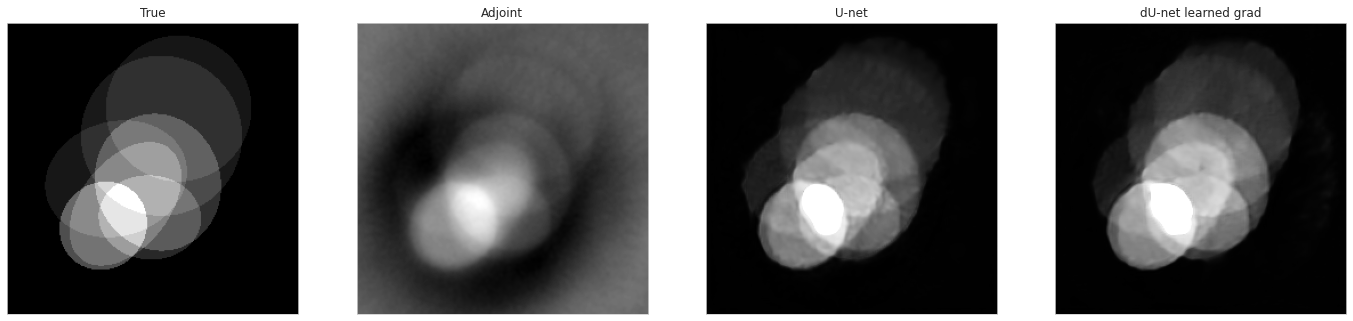

4


In [18]:
for i in range(1,5):
    compare([ims[i] for ims in test_ims], ncols=3, nrows=1, titles=train_titles, same_scale=False)
    print(i)

In [19]:
statistics_robustness = pd.read_csv("statistics_robustness.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics_robustness.dropna(inplace=True)

Text(0, 0.5, 'reconstruction PSNR (dB)')

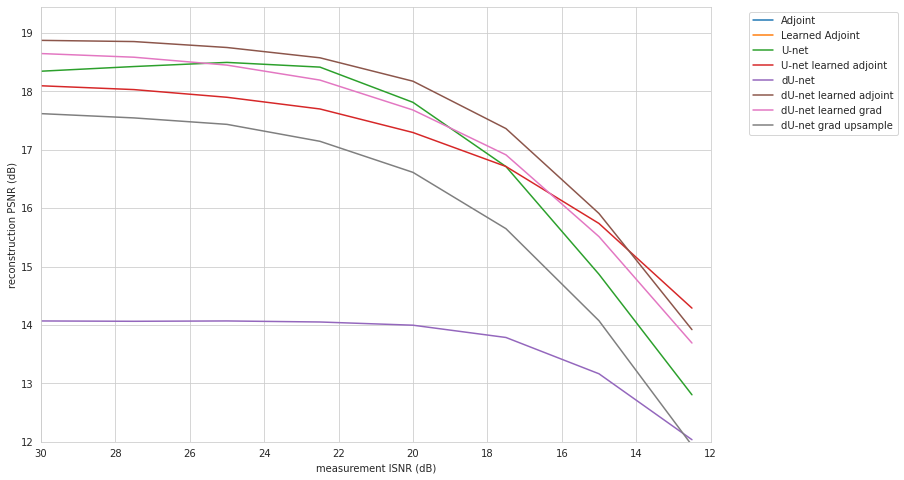

In [20]:
plt.figure(figsize=(12,8))
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Test":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values, label = name)

plt.axis(ymin=12, xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("measurement ISNR (dB)")
plt.ylabel("reconstruction PSNR (dB)")

Text(0, 0.5, 'reconstruction SSIM ')

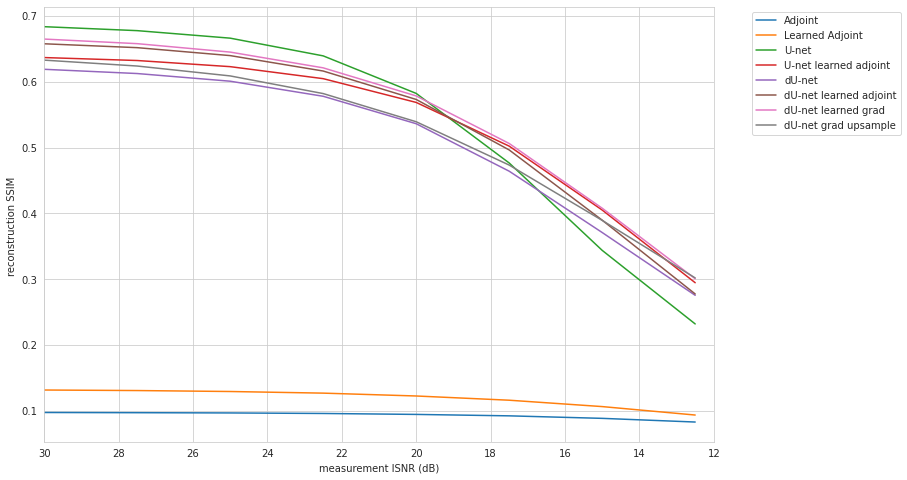

In [21]:
plt.figure(figsize=(12,8))
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Train":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, label = name)

plt.axis( xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("measurement ISNR (dB)")
plt.ylabel("reconstruction SSIM ")